In [84]:
import pandas as pd

In [85]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [86]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset = dataset.replace({True: 1, False: 0})
dataset

C:\Users\Admin\AppData\Local\Temp\ipykernel_6760\2608311118.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({True: 1, False: 0})


,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [87]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [88]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]

In [89]:
dependent=dataset[["charges"]]

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent, dependent, test_size=0.30,random_state=0)

In [148]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson',splitter='best',max_features='log2') 
regressor=regressor.fit(X_train,Y_train)

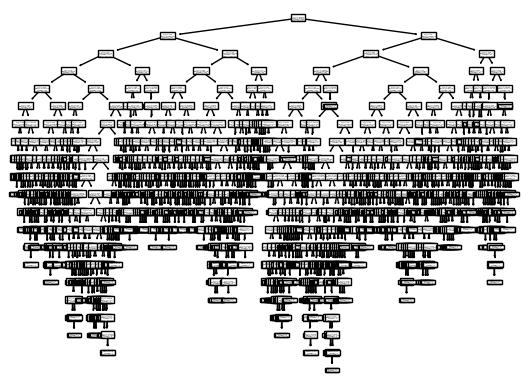

In [149]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [150]:
Y_pred=regressor.predict(X_test)

In [151]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,Y_pred )

In [152]:
r_score

0.7098417887595101